# PCA - MNIST

En éste ejercicio vamos a aplicar PCA y K-means al digits dataset similar a MNIST, que incluye imágenes de dígitos de 8x8 píxeles. La idea es intentar recopilar información sobre la distribución de las imágenes, usando visualizaciones que permitan clarificar cómo interpretar los resultados obtenidos por PCA.

### Importamos librerías

In [ ]:
# Use black formatter
# %load_ext lab_black

import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import io
import sys
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize
from sklearn.datasets import load_digits

In [1]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Importamos el dataset

In [3]:
# Cargamos los datos de training
X, y = load_digits(return_X_y=True)
print("Formato del dataset: {}".format(X.shape))

Formato del dataset: (1797, 64)


In [4]:
print("Formato de las etiquetas: {}".format(y.shape))

Formato de las etiquetas: (1797,)


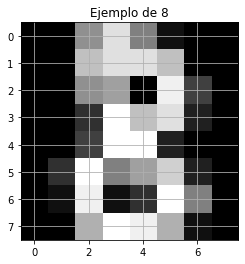

In [5]:
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap="gray")

---

## Consignas

Siguiendo los ejemplos vistos en clase sobre los datasets de Human Activity Recognition y Fashion MNIST, realizar las siguientes consignas:

1. Aplicar PCA sobre el dataset para poder explicar el 90% de la varianza. ¿Cuántos componentes se requieren?
2. Graficar un scree plot (varianza contemplada en función del número de componentes considerados)
3. Visualizar gráficamente los primeros 5 componentes ¿Qué conclusiones se puede sacar de cada componente? [OPCIONAL].
4. Visualizar la imagen original vs. la reconstruida con los $m$ componentes del punto 1.
5. Graficar una matriz de correlación del dataset reducido.
6. Graficar los clusters de dígitos en 2 y 3 dimensiones usando los componentes obtenidos en PCA.
7. Aplicar K-means para clusterizar los dígitos ¿Cómo son los resultados?
8. Realizar un gráfico de inercia para obtener el número óptimo de clusters $k$.
9. Analizar visualmente los límites del cluster de algún dígito y "generar" artificialmente el dígito dándole valores a los primeros dos componentes de PCA.

## Resolución

1.

In [6]:
X = normalize(X)

pca = PCA()
transformed_X = pca.fit(X)
eigenvalues = pca.explained_variance_

evalues_sum = np.sum(eigenvalues)
evalues_90 = np.array([])
var = 0
n_components = 0

while var < 0.9:
    evalues_90 = np.append(evalues_90, eigenvalues[n_components])
    var = np.sum(evalues_90) / evalues_sum
    n_components += 1

print(
    f"Para obtener {var*100:.2f}% de la varianza, son necesarios {n_components} de {eigenvalues.shape[0]} componentes"
)

Para obtener 90.56% de la varianza, son necesarios 21 de 64 componentes


2.

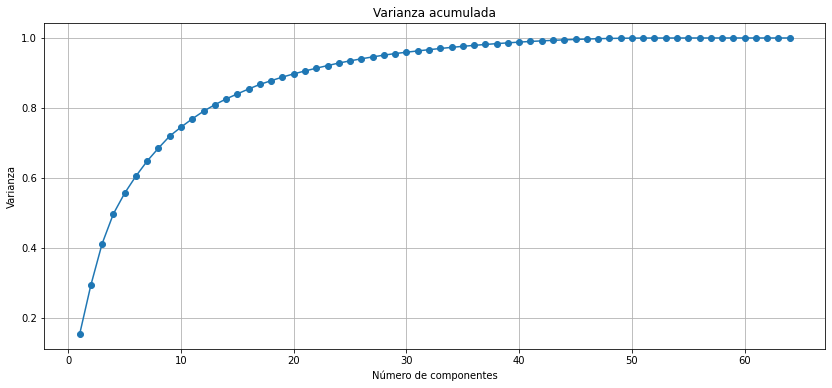

In [7]:
x_values = np.arange(eigenvalues.shape[0]) + 1
y_values = eigenvalues.cumsum() / evalues_sum

plt.figure(figsize=(14, 6))
plt.grid(True)
plt.plot(x_values, y_values, "o-")
plt.title("Varianza acumulada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza")
plt.show()

3.

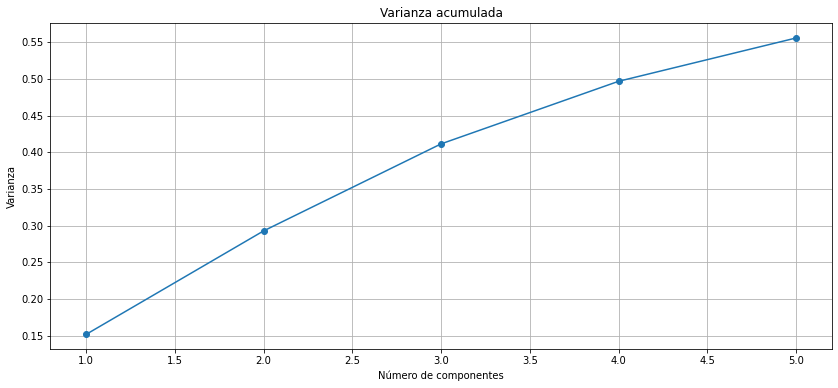

Los primeros 5 valores acumulan el 55.59% de la varianza
Componente 1: 15.16%
Componente 2: 14.11%
Componente 3: 11.87%
Componente 4: 8.53%
Componente 5: 5.91%


In [8]:
n = 5

plt.figure(figsize=(14, 6))
plt.grid(True)
plt.plot(x_values[:n], y_values[:n], "o-")
plt.title("Varianza acumulada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza")
plt.show()

print(f"Los primeros {n} valores acumulan el { y_values[n-1]*100:.2f}% de la varianza")
for i in range(n):
    print(f"Componente {i+1}: {eigenvalues[i]/evalues_sum*100:.2f}%")

4.

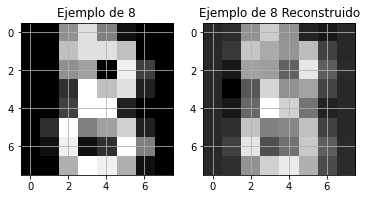

In [9]:
pca.n_components = n_components
transformed_X = pca.fit_transform(X)

original_example = X[8, :].reshape((8, 8))
reconstructed_example = pca.inverse_transform(transformed_X[8, :]).reshape((8, 8))

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.grid(True)
ax1.set_title(f"Ejemplo de {y[8]}")
ax1.imshow(original_example, cmap="gray")

ax2 = fig.add_subplot(122)
ax2.grid(True)
ax2.set_title(f"Ejemplo de {y[8]} Reconstruido")
ax2.imshow(reconstructed_example, cmap="gray")

5.

In [10]:
corr_mat = np.corrcoef(transformed_X.T)

# Es necesario castear a int para imprimir correctamente la matriz y evitar errores de redondeo
print(corr_mat.round().astype(int))
print("Las nuevas features no se encuentran correlacionadas")

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
Las nuevas features no se encuentran correlacionadas


6.

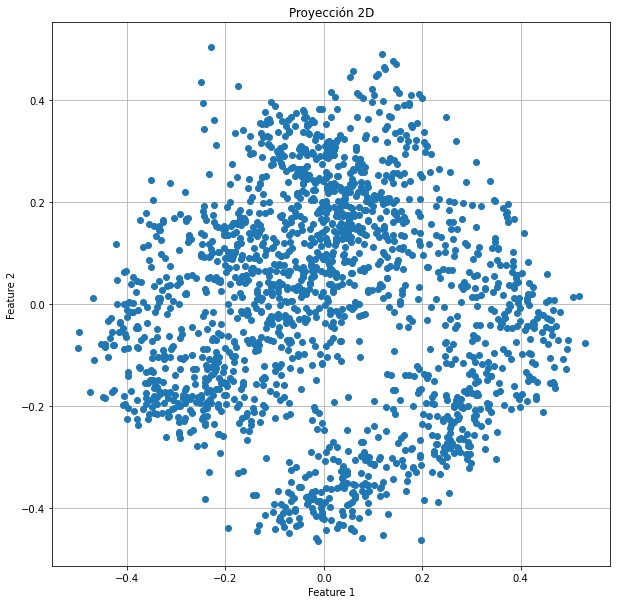

In [11]:
pca.n_components = 2
X_2d = pca.fit_transform(transformed_X)

plt.figure(figsize=(10, 10))
plt.grid(True)
plt.plot(X_2d[:, 0], X_2d[:, 1], "o")
plt.title("Proyección 2D")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

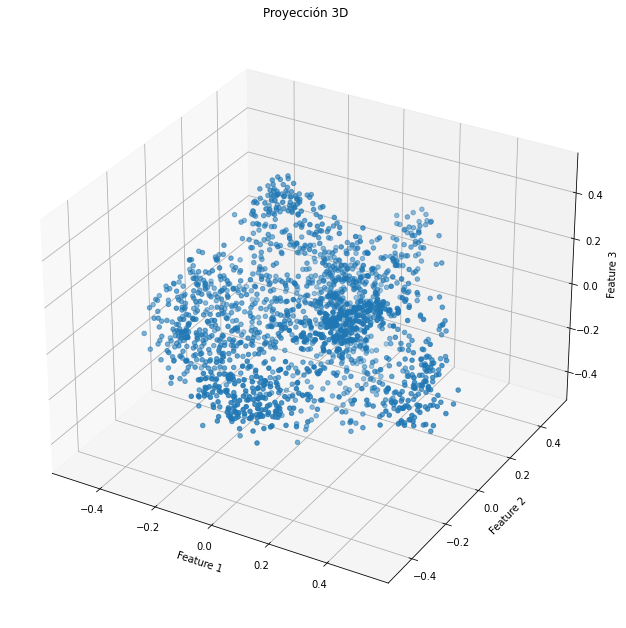

In [12]:
pca.n_components = 3
X_3d = pca.fit_transform(transformed_X)

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(projection="3d")
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2])
ax.set_title("Proyección 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

7.

In [13]:
colors = ["red", "green", "cornflowerblue", "mediumpurple", "magenta", "orange", "pink", "lightblue", "gray", "lime"]  # fmt: skip


def kmeans_plot(X, y, clusters):
    plt.figure(figsize=(10, 10))

    for i in range(clusters.shape[0]):
        x_indices = np.argwhere(y == i)
        plt.scatter(X[x_indices, 0], X[x_indices, 1], c=colors[i], marker="o")
        plt.scatter(clusters[i, 0], clusters[i, 1], c="black", s=100)
        plt.title("Proyección 2D Clusterizada")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

    plt.show()

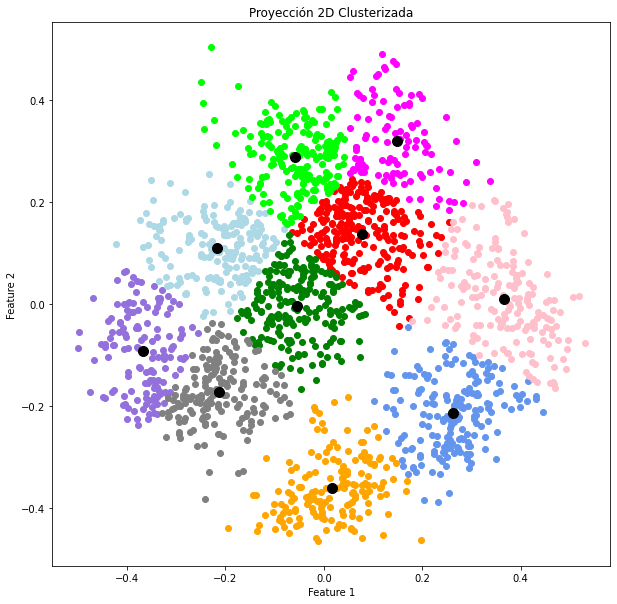


La clusterización parece ser correcta, algunos clusters pueden
reconocerse facilmente, como por ejemplo los de la esquina 
inferior derecha. Los que se encuentran más en el centro son 
más difíciles de identificar visualmente


In [14]:
n_clusters = len(list(dict.fromkeys(y)))
kmeans_2d = KMeans(n_clusters=n_clusters)
y_2d = kmeans_2d.fit_predict(X_2d)

kmeans_plot(X_2d, y_2d, kmeans_2d.cluster_centers_)
print(
    """
La clusterización parece ser correcta, algunos clusters pueden
reconocerse facilmente, como por ejemplo los de la esquina 
inferior derecha. Los que se encuentran más en el centro son 
más difíciles de identificar visualmente"""
)

8.

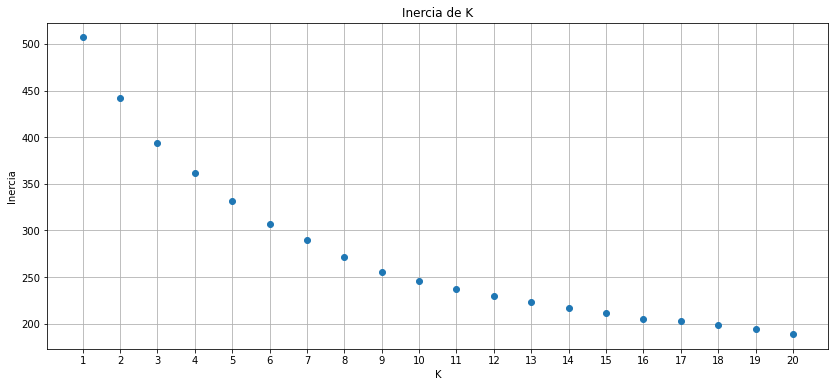

Siguiendo la regla del codo el valor optimo podria estar entre 8 y 11 clusters


In [15]:
max_clusters = 20
k_num = np.arange(1, max_clusters + 1)
inertia = []

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i).fit(transformed_X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))
plt.grid(True)
plt.plot(k_num, inertia, "o")
plt.title("Inercia de K")
plt.xlabel("K")
plt.xticks(k_num)
plt.ylabel("Inercia")
plt.show()

print("Siguiendo la regla del codo el valor optimo podria estar entre 8 y 11 clusters")

9.

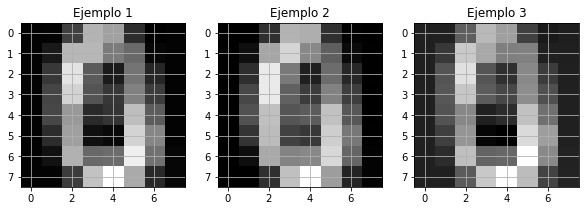

In [16]:
# Elegimos tres puntos que parecieran pertencer a un mismo cluster que se encuentra en la parte central inferior del gráfico 2d
test_X = np.array([[0, -0.4], [0.1, -0.3], [-0.1, -0.5]])

y_predict = kmeans_2d.predict(test_X)

pca.n_components = 2
pca.fit_transform(X)

fig = plt.figure(figsize=(10, 10))
for i in range(test_X.shape[0]):
    reconstructed_example = pca.inverse_transform(test_X[i]).reshape((8, 8))

    ax = fig.add_subplot(int(f"13{i+1}"))
    ax.grid(True)
    ax.set_title(f"Ejemplo {i+1}")
    ax.imshow(reconstructed_example, cmap="gray")